In [6]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
# Cargar datos
Purchases_Final = pd.read_csv('/content/PurchasesFINAL.csv')

In [8]:
Purchases_Final.shape

(274805, 16)

In [9]:
Purchases_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274805 entries, 0 to 274804
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     274805 non-null  object 
 1   Store           274805 non-null  int64  
 2   Brand           274805 non-null  int64  
 3   Description     274805 non-null  object 
 4   Size            274805 non-null  object 
 5   VendorNumber    274805 non-null  int64  
 6   VendorName      274805 non-null  object 
 7   PONumber        274805 non-null  int64  
 8   PODate          274805 non-null  object 
 9   ReceivingDate   274804 non-null  object 
 10  InvoiceDate     274804 non-null  object 
 11  PayDate         274804 non-null  object 
 12  PurchasePrice   274804 non-null  float64
 13  Quantity        274804 non-null  float64
 14  Dollars         274804 non-null  float64
 15  Classification  274804 non-null  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 33.5+ M

In [11]:
# Formato Fecha
Purchases_Final['PODate'] = pd.to_datetime(Purchases_Final['PODate'])
Purchases_Final.set_index('PODate', inplace=True)

In [12]:
# Formato Fecha
Purchases_Final['ReceivingDate'] = pd.to_datetime(Purchases_Final['ReceivingDate'])
# Formato Fecha
Purchases_Final['InvoiceDate'] = pd.to_datetime(Purchases_Final['InvoiceDate'])
# Formato Fecha
Purchases_Final['PayDate'] = pd.to_datetime(Purchases_Final['PayDate'])



In [13]:
Purchases_Final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274805 entries, 2015-12-21 to 2016-02-14
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InventoryId     274805 non-null  object        
 1   Store           274805 non-null  int64         
 2   Brand           274805 non-null  int64         
 3   Description     274805 non-null  object        
 4   Size            274805 non-null  object        
 5   VendorNumber    274805 non-null  int64         
 6   VendorName      274805 non-null  object        
 7   PONumber        274805 non-null  int64         
 8   ReceivingDate   274804 non-null  datetime64[ns]
 9   InvoiceDate     274804 non-null  datetime64[ns]
 10  PayDate         274804 non-null  datetime64[ns]
 11  PurchasePrice   274804 non-null  float64       
 12  Quantity        274804 non-null  float64       
 13  Dollars         274804 non-null  float64       
 14  Classification  2748

In [14]:
for i in Purchases_Final.columns:
    print(i)
    print(Purchases_Final[i].describe())
    print('---------------------------------')

InventoryId
count                 274805
unique                118489
top       67_EANVERNESS_3545
freq                      30
Name: InventoryId, dtype: object
---------------------------------
Store
count    274805.000000
mean         43.323335
std          23.561189
min           1.000000
25%          23.000000
50%          45.000000
75%          66.000000
max          79.000000
Name: Store, dtype: float64
---------------------------------
Brand
count    274805.000000
mean      12542.568159
std       12654.928479
min          58.000000
25%        3650.000000
50%        6479.000000
75%       19220.000000
max       90086.000000
Name: Brand, dtype: float64
---------------------------------
Description
count                     274805
unique                      5869
top       Capt Morgan Spiced Rum
freq                        2016
Name: Description, dtype: object
---------------------------------
Size
count     274805
unique        38
top        750mL
freq      140248
Name: Size, dtype

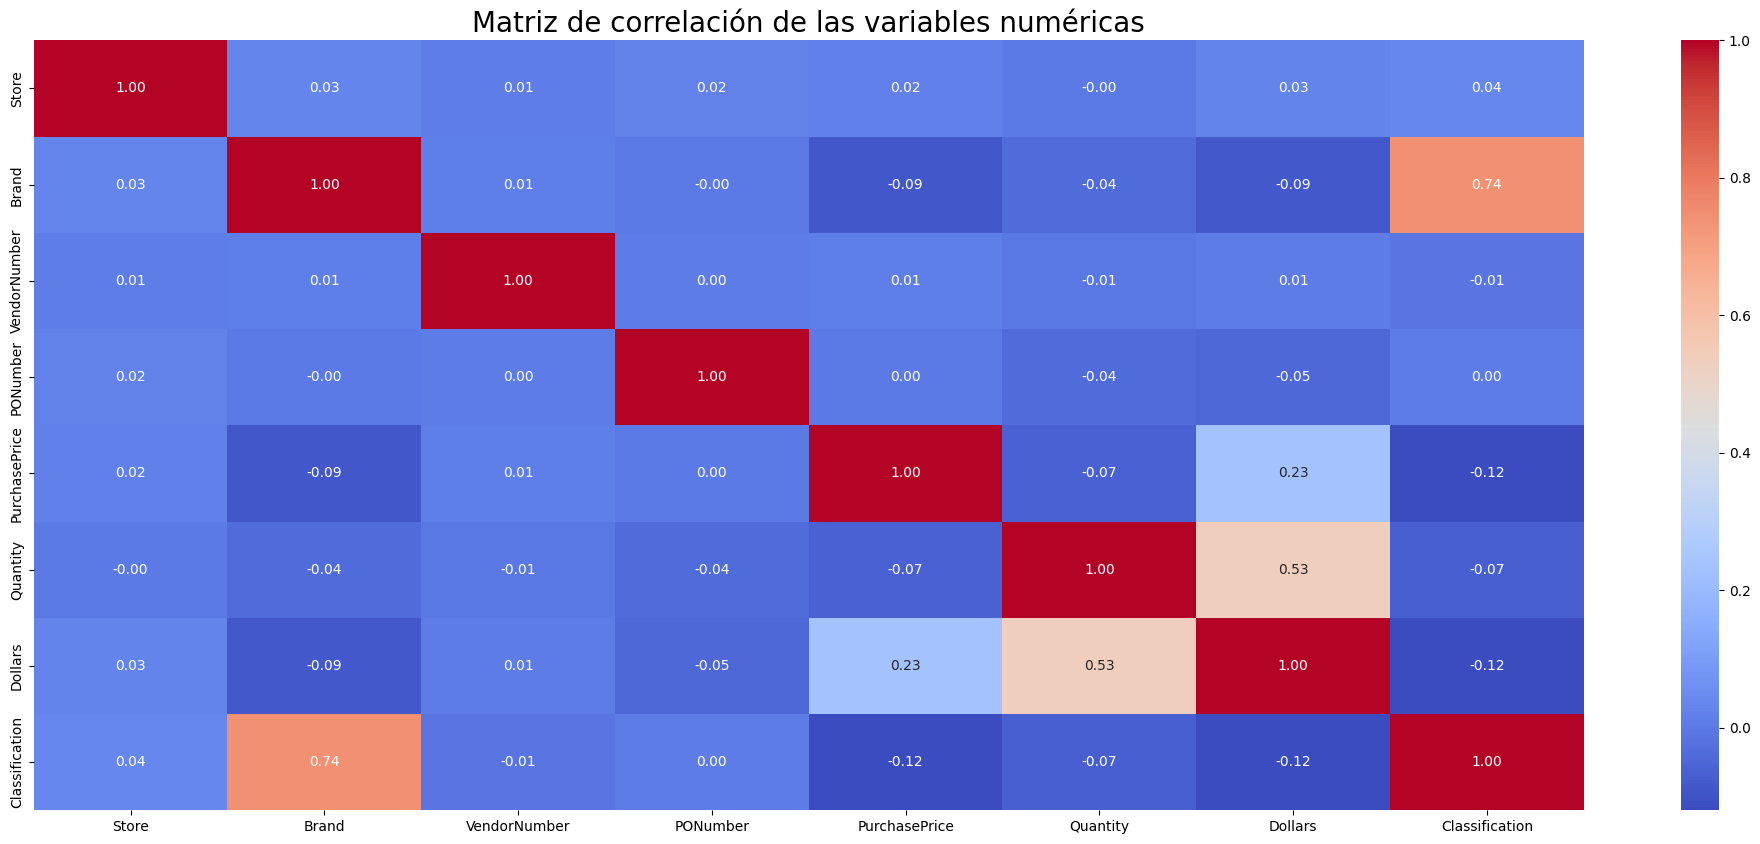

In [15]:
#Se crea la matriz de correlación de las variables numéricas para verificar alguna correlación que permita análisis
numeric_columns = Purchases_Final.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = Purchases_Final[numeric_columns].corr()

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

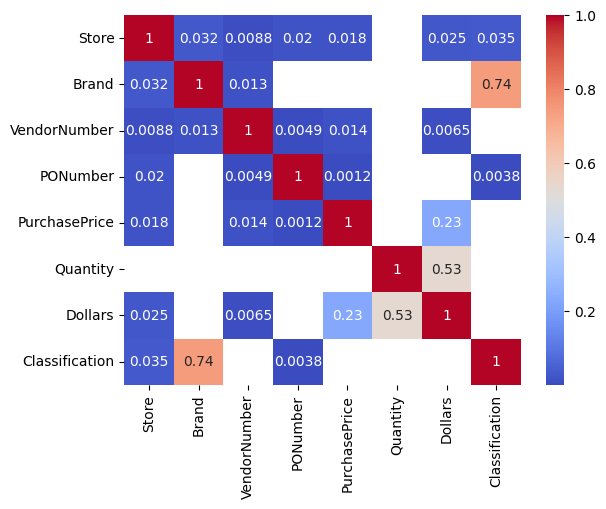

In [16]:
sns.heatmap(Purchases_Final.corr(numeric_only=True),annot=True,cmap='coolwarm',mask=Purchases_Final.corr(numeric_only=True)<0)
plt.show()


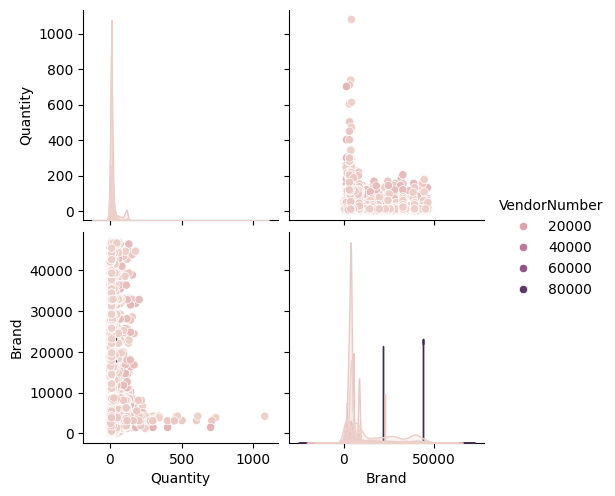

In [ ]:
sns.pairplot(Purchases_Final, vars=['Quantity', 'Brand'], hue='VendorNumber')
plt.show()



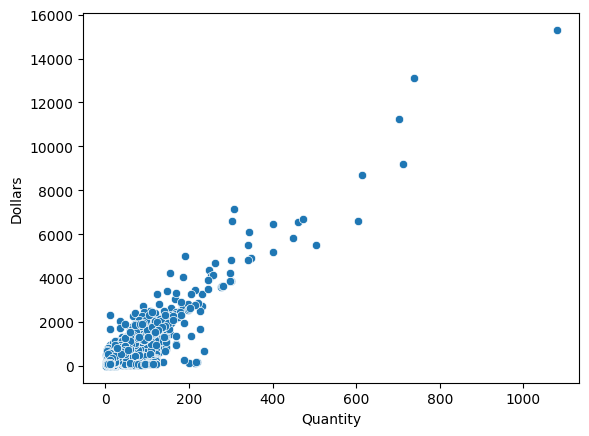

In [ ]:
sns.scatterplot(data= Purchases_Final,x="Quantity",y="Dollars")
plt.show()


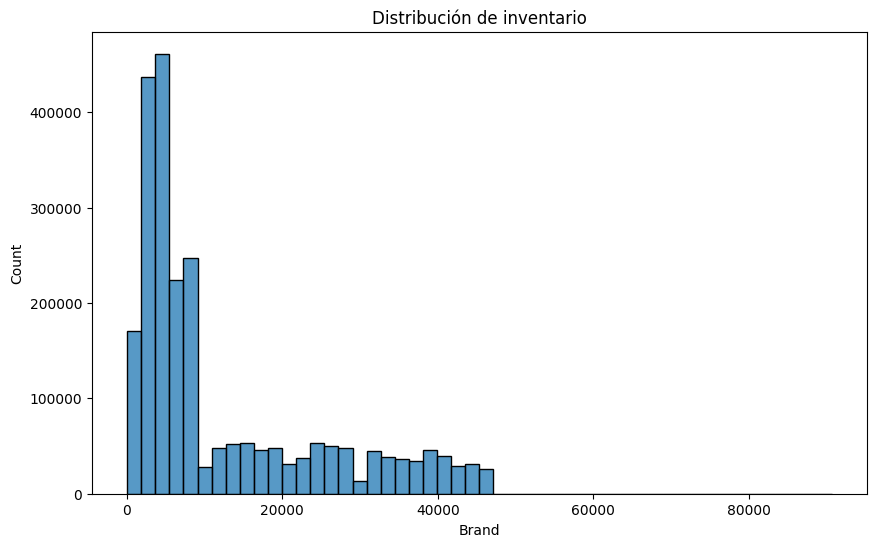

In [ ]:
# Análisis de distribución de inventario
plt.figure(figsize=(10, 6))
sns.histplot(Purchases_Final['Brand'], bins=50)
plt.title('Distribución de inventario')
plt.show()

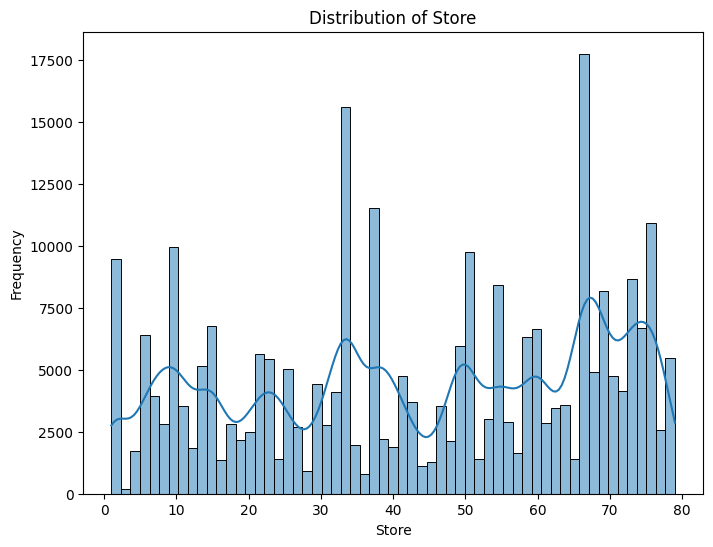

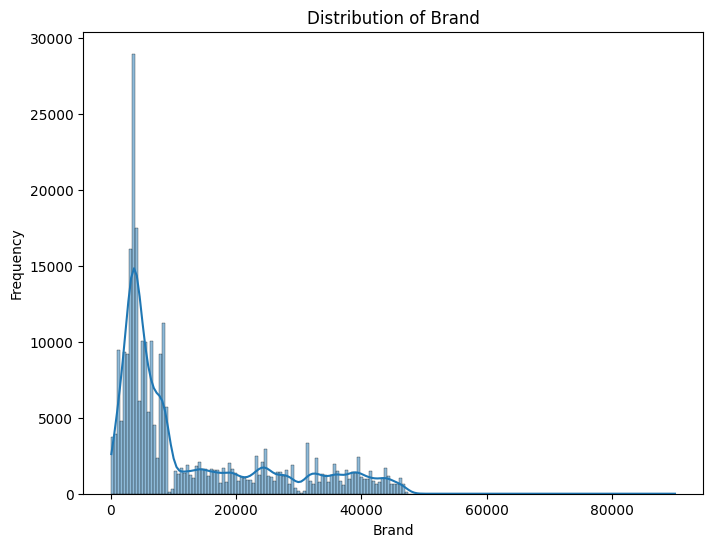

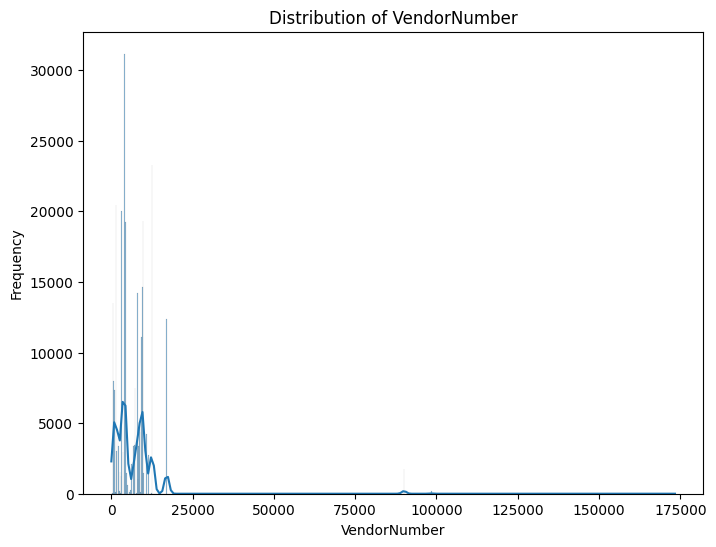

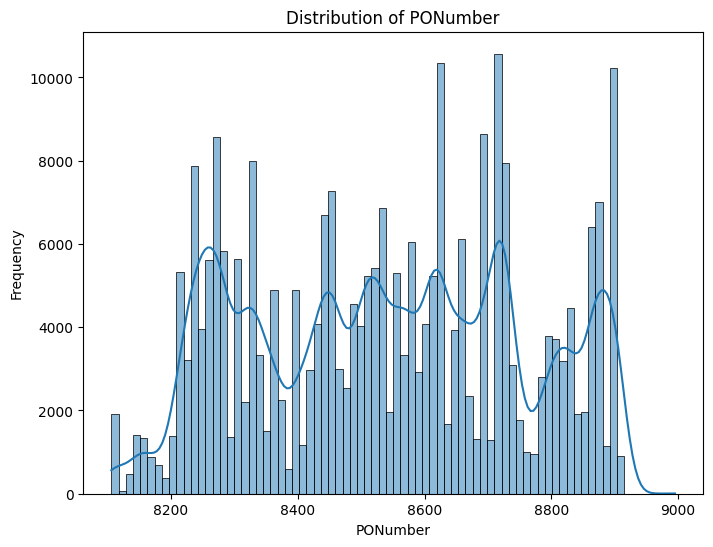

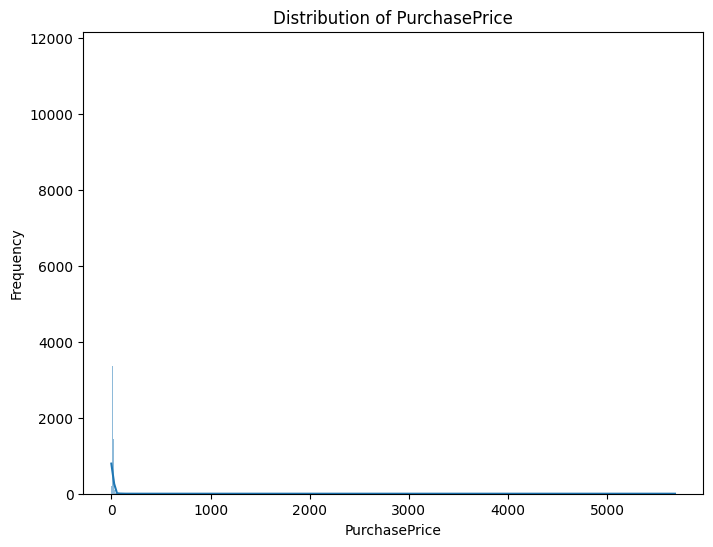

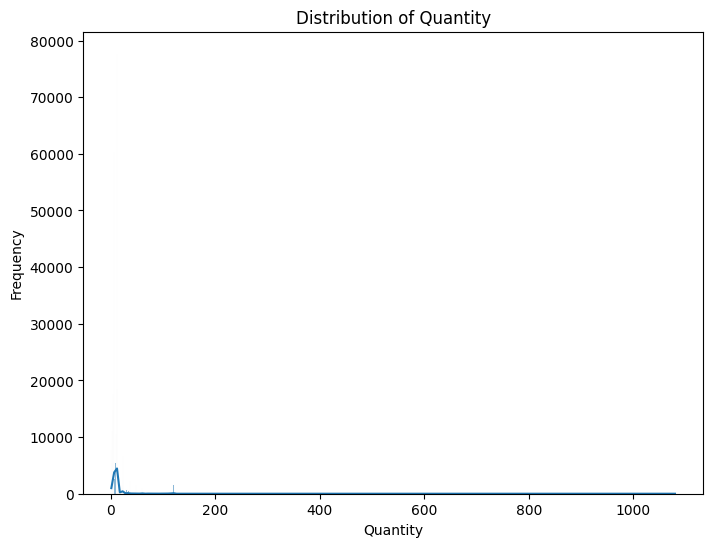

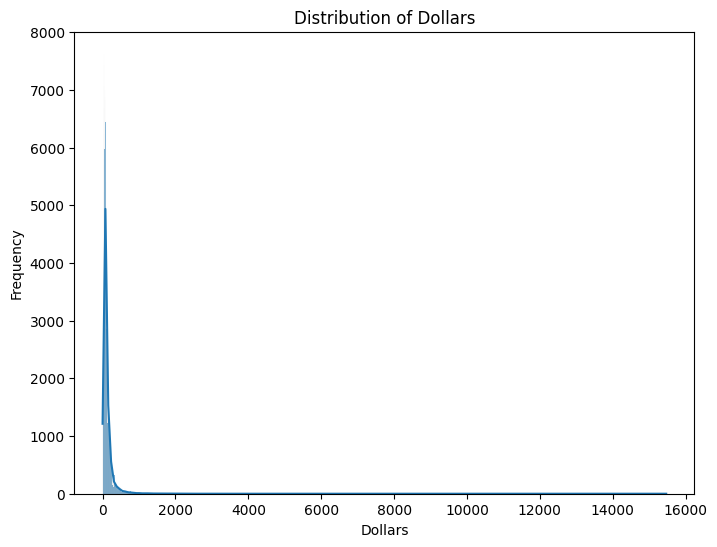

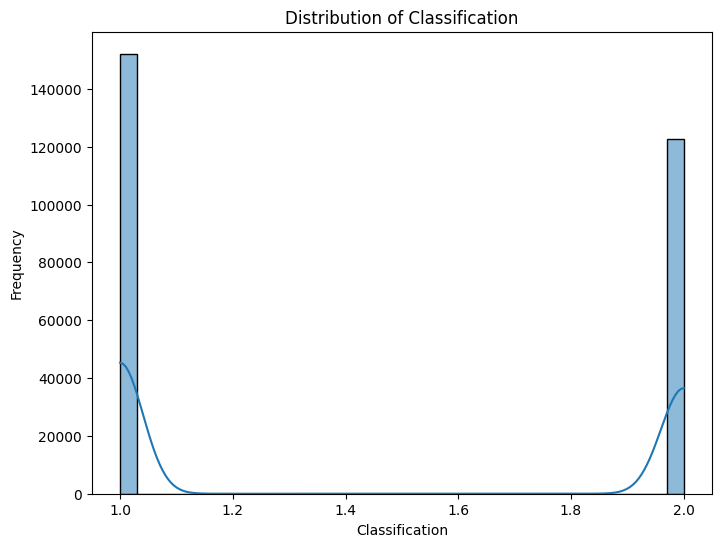

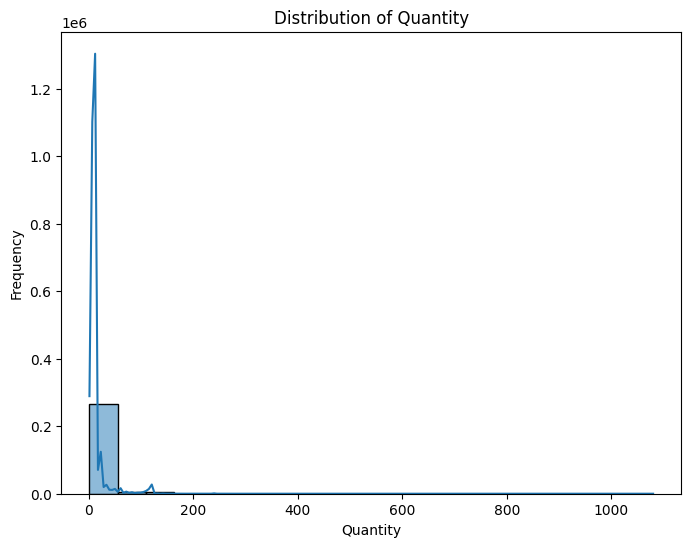

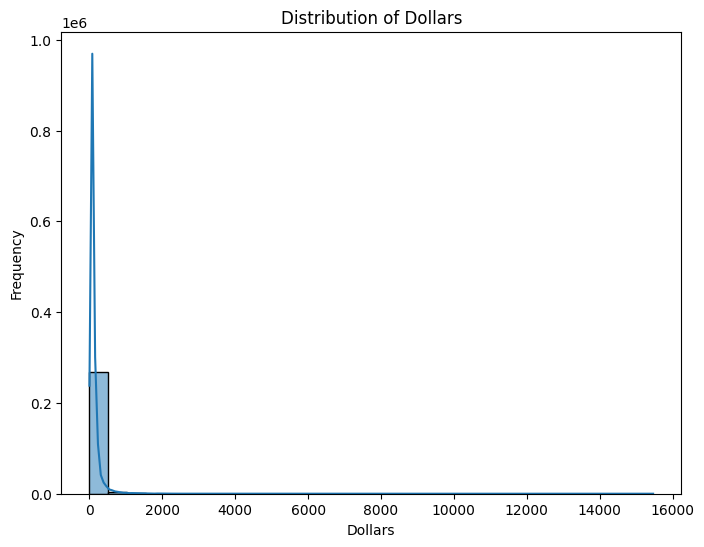

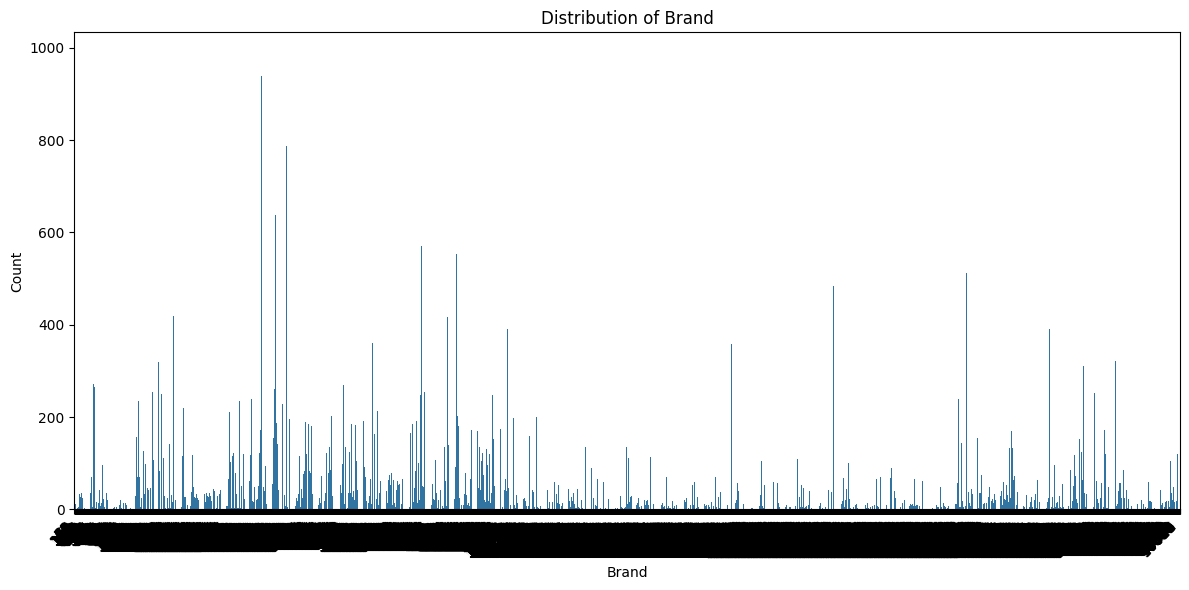

In [17]:
# prompt: histogramas

# --- Histograms for Numerical Columns ---
numeric_cols = Purchases_Final.select_dtypes(include=['number'])

for col in numeric_cols.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(Purchases_Final[col], kde=True)  # Include KDE for better visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# --- Example for specific columns (replace with your desired columns) ---
plt.figure(figsize=(8, 6))
sns.histplot(Purchases_Final['Quantity'], bins=20, kde=True)  # Adjust number of bins as needed
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(Purchases_Final['Dollars'], bins=30, kde=True)
plt.title('Distribution of Dollars')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.show()

# --- Histogram for 'Brand' (categorical variable) ---
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability if needed
sns.countplot(x='Brand', data=Purchases_Final) # Use countplot for categorical data
plt.title('Distribution of Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [18]:
# prompt: correlacion entre variables

# Calculate the correlation matrix for numeric columns
correlation_matrix = Purchases_Final.corr(numeric_only=True)

# Display the correlation matrix
print(correlation_matrix)

# You can access specific correlations like this:
correlation_quantity_dollars = correlation_matrix.loc['Quantity', 'Dollars']
print(f"\nCorrelation between Quantity and Dollars: {correlation_quantity_dollars}")

                   Store     Brand  VendorNumber  PONumber  PurchasePrice  \
Store           1.000000  0.032372      0.008801  0.020202       0.018349   
Brand           0.032372  1.000000      0.013382 -0.000567      -0.092096   
VendorNumber    0.008801  0.013382      1.000000  0.004943       0.014066   
PONumber        0.020202 -0.000567      0.004943  1.000000       0.001205   
PurchasePrice   0.018349 -0.092096      0.014066  0.001205       1.000000   
Quantity       -0.000913 -0.039819     -0.005781 -0.038086      -0.065003   
Dollars         0.025087 -0.085809      0.006485 -0.048288       0.231178   
Classification  0.035426  0.743238     -0.013487  0.003770      -0.118657   

                Quantity   Dollars  Classification  
Store          -0.000913  0.025087        0.035426  
Brand          -0.039819 -0.085809        0.743238  
VendorNumber   -0.005781  0.006485       -0.013487  
PONumber       -0.038086 -0.048288        0.003770  
PurchasePrice  -0.065003  0.231178       

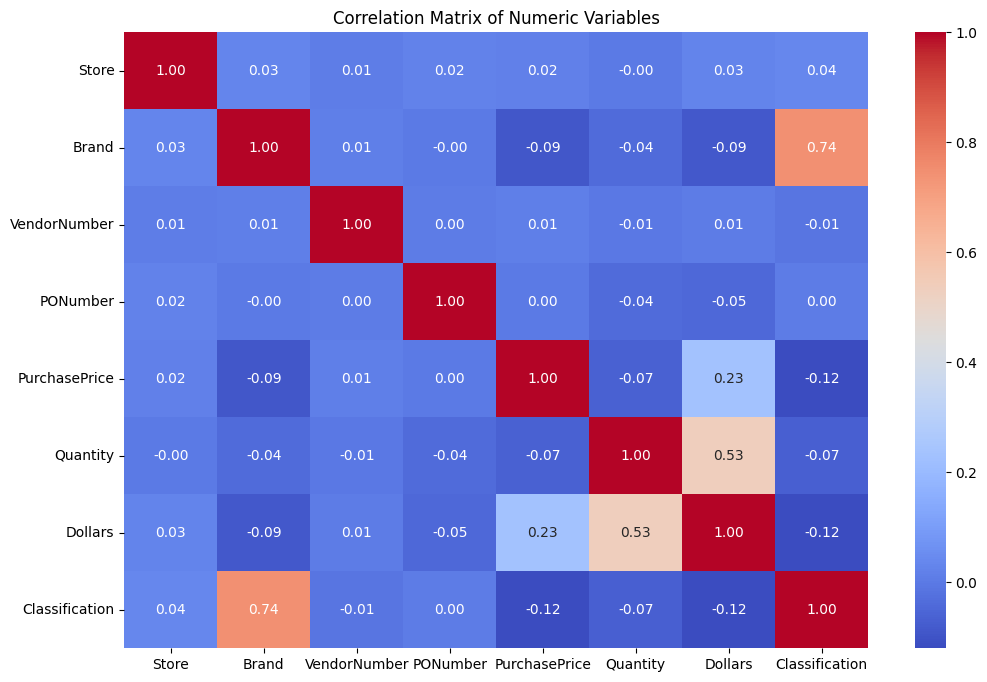

In [19]:
# prompt: grafico correlaciones


# Convert relevant columns to numeric if they aren't already
for col in ['Quantity', 'Dollars']:  # Add other numeric columns as needed
    try:
        Purchases_Final[col] = pd.to_numeric(Purchases_Final[col], errors='coerce')
    except KeyError:
        print(f"Column '{col}' not found in DataFrame.")


# Calculate the correlation matrix for numeric columns, handling potential errors
try:
    correlation_matrix = Purchases_Final.corr(numeric_only=True)
except KeyError:
    print("Error calculating correlation matrix. Check for non-numeric data in relevant columns.")

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

<Figure size 1200x800 with 0 Axes>

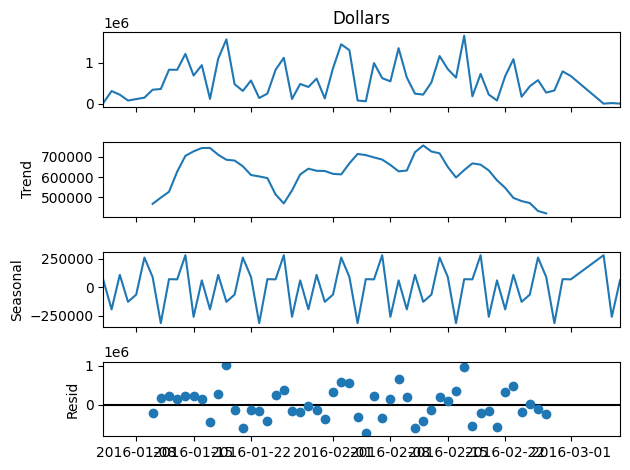

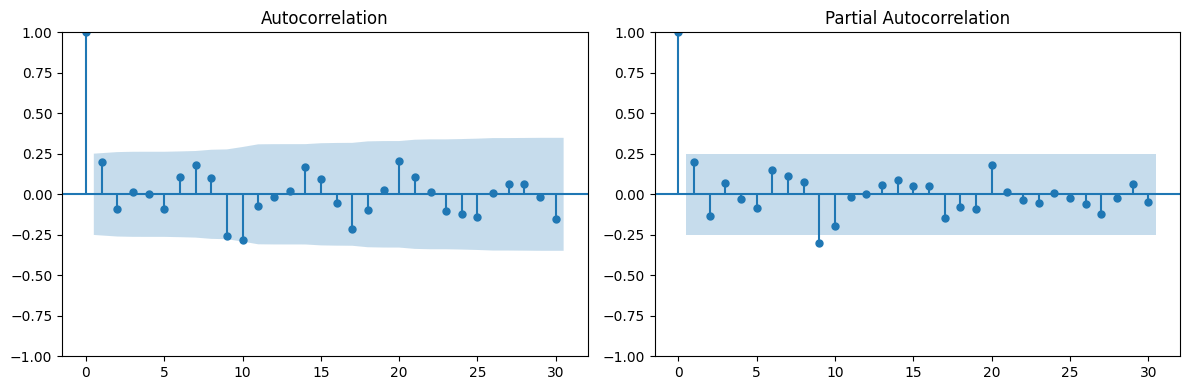

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

                               SARIMAX Results                                
Dep. Variable:                Dollars   No. Observations:                   61
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -863.978
Date:                Wed, 11 Dec 2024   AIC                           1739.955
Time:                        08:40:42   BIC                           1752.521
Sample:                             0   HQIC                          1744.871
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6001      0.122     -4.903      0.000      -0.840      -0.360
ar.L2         -0.6455      0.139     -4.635      0.000      -0.918      -0.373
ar.L3         -0.4553      0.156     -2.911      0.0

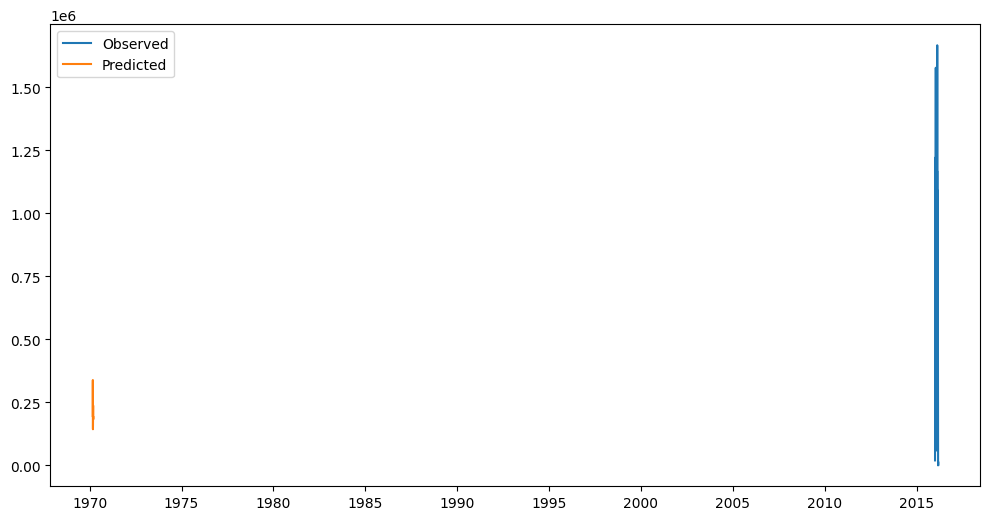

In [22]:
# prompt: series temporales

# Time series analysis
# Group data by date and sum the 'Dollars'
ts = Purchases_Final.groupby('InvoiceDate')['Dollars'].sum()

# Time series decomposition
decomposition = seasonal_decompose(ts, model='additive', period=12) # Assuming yearly seasonality (adjust period as needed)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Autocorrelation and partial autocorrelation plots (ACF and PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(ts, lags=30, ax=plt.gca())  # Adjust lags as needed
plt.subplot(122)
plot_pacf(ts, lags=30, ax=plt.gca())
plt.tight_layout()
plt.show()

# Example ARIMA model (you may need to adjust the order parameters)
from statsmodels.tsa.arima.model import ARIMA

try:
    # Fit the ARIMA model
    model = ARIMA(ts, order=(5, 1, 0)) # Example: ARIMA(5,1,0)
    results = model.fit()

    # Print model summary
    print(results.summary())

    # Make predictions (e.g., for the next 12 periods)
    predictions = results.predict(start=len(ts), end=len(ts) + 11) # Forecast the next 12 periods
    print(predictions)

    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Observed')
    plt.plot(predictions, label='Predicted')
    plt.legend()
    plt.show()
except Exception as e:  #Catch the specific exception
    print(f"An error occurred during ARIMA modeling: {e}")